# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Collect and load data

In [2]:
pop=pd.read_csv('bigcity.csv')
pop.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [3]:
pop.tail()

,Unnamed: 0,u,x
44,45,87,105
45,46,43,61
46,47,43,50
47,48,161,232
48,49,36,54


In [4]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
Unnamed: 0    49 non-null int64
u             49 non-null int64
x             49 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


# 3. Explore numeric variables - five number summary

# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

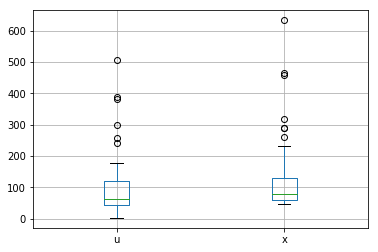

In [5]:
pop[['u','x']].boxplot()
plt.show()

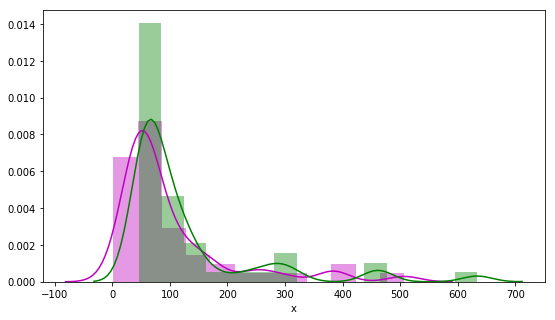

In [6]:
plt.figure(figsize=(9,5))
ax=sns.distplot(pop.u, color='m')
sns.distplot(pop.x, color='g')
plt.show()

In [7]:
# Measuring Std deviation and variance of the data

statsumm =pop.describe().T

print("Standard Deviation of population in 1920: ", statsumm.iloc[1,2])
print("Variance of population in 1920: ", np.sqrt(statsumm.iloc[1,2]))
print("\nStandard Deviation of population in 1930: ", statsumm.iloc[2,2])
print("Variance of population in 1930: ", np.sqrt(statsumm.iloc[2,2]))

Standard Deviation of population in 1920:  104.40506054146351
Variance of population in 1920:  10.217879454244091

Standard Deviation of population in 1930:  123.12121053252034
Variance of population in 1930:  11.095999753628346


#### Observation:

1. Both population of 1920 and 1930's shows many outliers.  Means of Populations of 1920 and 1930 shows increase in population.

2. Histogram shows both samples are right skewed. Variance of the samples is same apprx. We need to correct the Right skewness by Log transformation to bring the data distribution close to Normal


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

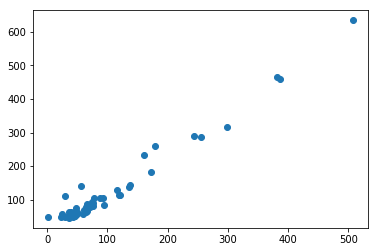

In [8]:
plt.scatter(pop.u, pop.x)
plt.show()

Since Data Frame has no categorical variable, to explore data through crosstab

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [9]:
X=np.log(np.array(pop.u))
y=np.log(np.array(pop.x))
pop.u=X
pop.x=y

Checking the shape of Data Distribution after Transformation 

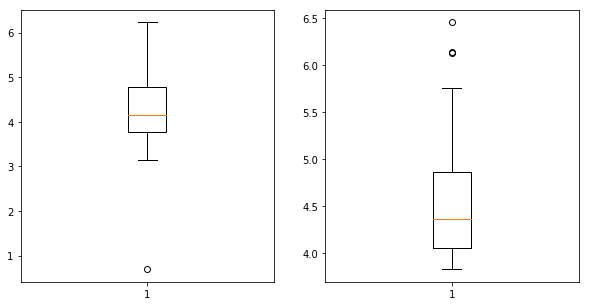

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].boxplot(X)
ax[1].boxplot(y)
plt.show()

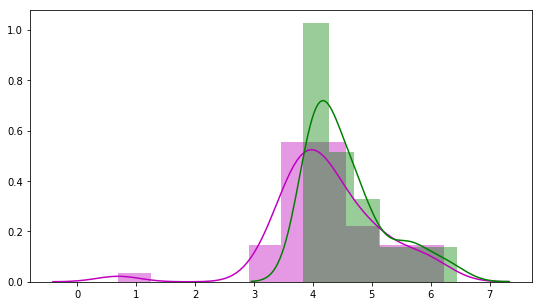

In [11]:
plt.figure(figsize=(9,5))
ax=sns.distplot(X, color='m')
sns.distplot(y, color='g')
plt.show()

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

In [12]:
print("Null values in u: ",pop['u'].isnull().sum())
print("Null values in x: ",pop['x'].isnull().sum())

Null values in u:  0
Null values in x:  0


In [13]:
print("Correlation Matrix:")
pop.iloc[:,1:].corr()

Correlation Matrix:


,u,x
u,1.000000,0.842586
x,0.842586,1.000000


### Observation:

1. No null values in both columns

2. Strong Correlation of 0.842586 is seen between the populaion of 49 cities in 1920 and the populaion of 49 cities in 1930.

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [14]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=1)

# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [15]:
from sklearn.linear_model import LinearRegression

xtrain=np.array(xtrain).reshape(-1, 1)
xtest=np.array(xtest).reshape(-1, 1)
ytest=np.array(ytest).reshape(-1, 1)

lm=LinearRegression()
model=lm.fit(xtrain, ytrain)
ypred=model.predict(xtest)

print("Coeficients(b1) : ", model.coef_)
print("Intercept(b0) : ", model.intercept_)

Coeficients(b1) :  [0.59588036]
Intercept(b0) :  2.0545509404658278


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

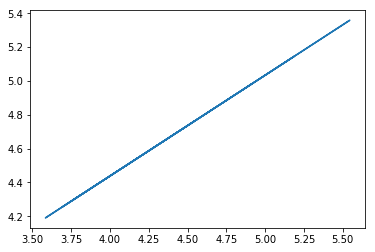

In [16]:
plt.plot(xtest, ypred)
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [17]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2 score : ", r2_score(ytest,ypred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(ytest,ypred)))

R2 score :  0.821721126921868
Root Mean Squared Error:  0.24770161559283652


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [18]:
print("Accuracy on the training dataset : ", lm.score(xtrain,ytrain))

Accuracy on the training dataset :  0.6866630133112397


In [19]:
print("Accuracy on the testing dataset : ", lm.score(xtest,ytest))

Accuracy on the testing dataset :  0.821721126921868
